# Setting enviroment

In [2]:
# Libraries
import pandas as pd
import os
import json
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading kaggle credentials
with open('kaggle.json') as jsonfile:
    cred = json.load(jsonfile)

In [7]:
# Kaggle credentials
os.environ['KAGGLE_USERNAME'] = cred['username']
os.environ['KAGGLE_KEY'] = cred['key']

# Importing data

In [8]:
# Donwloading data
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016

100%|████████████████████████████████████████| 397k/397k [00:00<00:00, 1.29MB/s]
100%|████████████████████████████████████████| 397k/397k [00:00<00:00, 1.29MB/s]


In [14]:
# Unziping data
with ZipFile('suicide-rates-overview-1985-to-2016.zip', 'r') as zf:
    zf.extractall()
    print('Done')

Done


In [3]:
# Importing as df
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Initial exploration

The statistic unit is country-year-sex, so we need to analyze the data taking in count this.

In [4]:
# Data dimensionality and variable types
print(df.dtypes, '\n', '\n', df.shape)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object 
 
 (27820, 12)


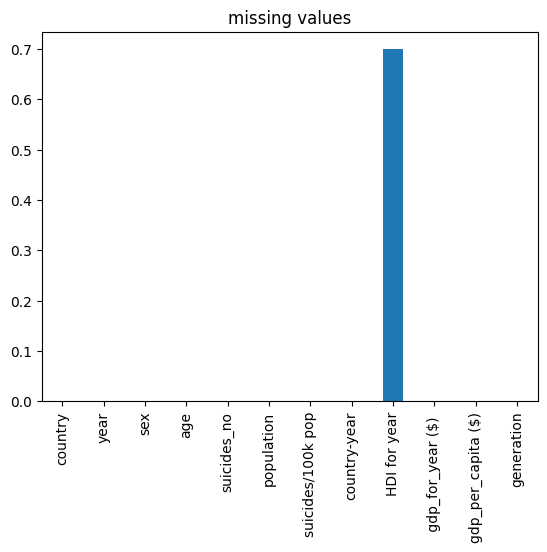

In [5]:
# Missing values
df.isnull().mean().plot(kind='bar')
plt.title('missing values')
plt.show()

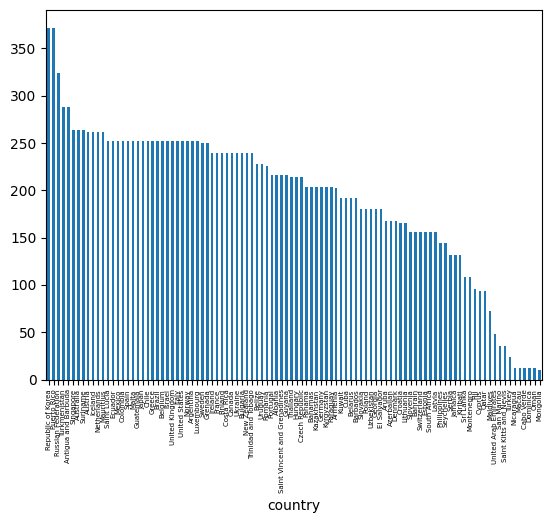

In [6]:
# Missing values by country
df[df['HDI for year'].isnull()]['country'].value_counts().plot(kind='bar')
plt.xticks(fontsize=5)
plt.show()

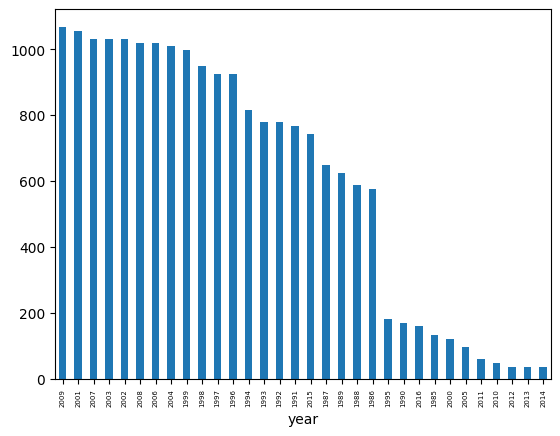

In [7]:
# Missing value by year
df[df['HDI for year'].isnull()]['year'].value_counts().plot(kind='bar')
plt.xticks(fontsize=5)
plt.show()

In [8]:
# Cheking type
try:
    df[' gdp_for_year ($) '].astype(float)
except:
    print("There are numbers can not be conveted to float")

There are numbers can not be conveted to float


In [9]:
# Unique values
df[['country', 'year', 'sex', 'age']].astype('str').describe(include='all')

,country,year,sex,age
count,27820,27820,27820,27820
unique,101,32,2,6
top,Mauritius,2009,male,15-24 years
freq,382,1068,13910,4642


In [10]:
# Function for completness
def completness(var1, var2):
    ct = pd.crosstab(var1, var2)
    ct['max'] = ct.max(axis=1)
    ct['min'] = ct.min(axis=1)
    ct = ct[ct['max'] != ct['min']]
    if ct.empty:
        return "Variables completed"
    else:
        return ct

In [11]:
# Completeness country vs sex
completness(df['country'], df['sex'])

'Variables completed'

In [12]:
# Completeness country vs age
completness(df['country'], df['age'])

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,max,min
country,,,,,,,,
Armenia,50,50,50,48,50,50,50,48
Austria,64,64,64,62,64,64,64,62
Croatia,44,44,44,42,44,44,44,42
Cyprus,30,30,30,28,30,30,30,28
Czech Republic,54,54,54,52,54,54,54,52
Grenada,52,52,52,50,52,52,52,50
Hungary,52,52,52,50,52,52,52,50
Iceland,64,64,64,62,64,64,64,62
Lithuania,44,44,44,42,44,44,44,42


In [13]:
# Completeness country vs year
completness(df['country'], df['year'].astype(str))

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,max,min
country,,,,,,,,,,,,,,,,,,,,,
Albania,0,0,12,12,12,0,0,12,12,12,...,12,12,0,0,0,0,0,0,12,0
Antigua and Barbuda,12,12,12,12,12,12,12,12,12,12,...,12,0,0,12,12,12,12,0,12,0
Argentina,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,0,12,0
Armenia,0,0,0,0,0,12,12,12,12,12,...,12,12,12,12,12,12,12,10,12,0
Aruba,0,0,0,0,0,0,0,0,0,0,...,12,12,12,0,0,0,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,0,0,0,0,0,0,0,0,0,0,...,12,12,0,0,0,0,0,0,12,0
United Kingdom,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,0,12,0
United States,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,0,12,0


In [14]:
# Completeness year vs sex
completness(df['year'], df['sex'])

'Variables completed'

In [15]:
# Completeness year vs age
completness(df['year'], df['age'])

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,max,min
year,,,,,,,,
2016,32,32,32,0,32,32,32,0


In [16]:
# Completeness sex vs age
completness(df['sex'], df['age'])

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,max,min
sex,,,,,,,,
female,2321,2321,2321,2305,2321,2321,2321,2305
male,2321,2321,2321,2305,2321,2321,2321,2305
